In [6]:
from flair.data import Corpus, Sentence

In [1]:
from flair.datasets import ColumnCorpus

# define columns
columns = {0: 'text', 1: 'NER'}

# this is the folder in which train, test and dev files reside
data_folder = '../../01_data/preprocessedData'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file='train_conll.csv',
                              test_file='test_conll.csv',
                              dev_file='dev_conll.csv').downsample(0.001)

2020-03-31 20:25:08,585 Reading data from ../../01_data/preprocessedData
2020-03-31 20:25:08,587 Train: ../../01_data/preprocessedData/train_conll.csv
2020-03-31 20:25:08,587 Dev: ../../01_data/preprocessedData/dev_conll.csv
2020-03-31 20:25:08,589 Test: ../../01_data/preprocessedData/test_conll.csv


In [2]:
from flair.data import Corpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

# 1. get the corpus
print(corpus)

# 2. what tag do we want to predict?
tag_type = 'NER'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Corpus: 158 train + 30 dev + 20 test sentences
Dictionary with 5 tags: <unk>, O, I-Answer, <START>, <STOP>


2020-03-31 21:27:23,502 ----------------------------------------------------------------------------------------------------
2020-03-31 21:27:23,519 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=5, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-03-31 21:27:23,520 ----------------------------------------------------------------------------------------------------
2020-03-31 21:27:23,521 Corpus: "Corpus: 158 train + 30 dev + 20 test sentences"
2020-03-31 21:27:23,522 ----------------------------------------------------------------------------------------------------
2020-03-31 21:27:23,522 Parameters:
2020-03-31 21:27:23,523  - learning_rate

/home/soeren/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/soeren/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


2020-03-31 21:27:31,087 ----------------------------------------------------------------------------------------------------
2020-03-31 21:27:31,690 epoch 2 - iter 1/5 - loss 11.32243919 - samples/sec: 59.69
2020-03-31 21:27:32,072 epoch 2 - iter 2/5 - loss 10.68566418 - samples/sec: 85.88
2020-03-31 21:27:32,789 epoch 2 - iter 3/5 - loss 10.36463261 - samples/sec: 45.18
2020-03-31 21:27:33,753 epoch 2 - iter 4/5 - loss 9.72896361 - samples/sec: 33.53
2020-03-31 21:27:34,204 epoch 2 - iter 5/5 - loss 9.59433193 - samples/sec: 72.61
2020-03-31 21:27:34,216 ----------------------------------------------------------------------------------------------------
2020-03-31 21:27:34,217 EPOCH 2 done: loss 9.5943 - lr 0.1000
2020-03-31 21:27:34,320 DEV : loss 6.9181060791015625 - score 0.0
2020-03-31 21:27:34,323 BAD EPOCHS (no improvement): 1
2020-03-31 21:27:37,872 ----------------------------------------------------------------------------------------------------
2020-03-31 21:27:38,407 epoch

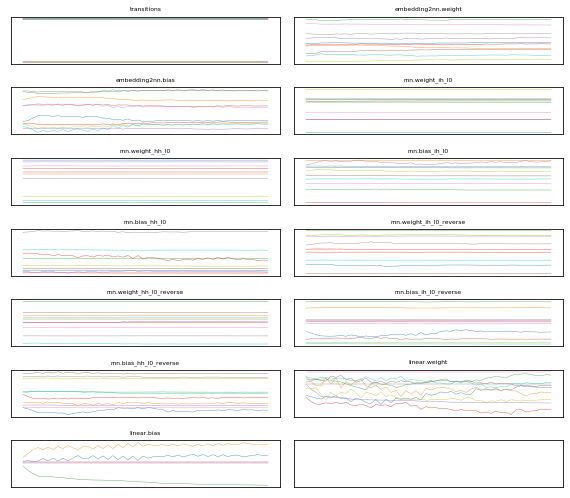

In [4]:
# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [

    WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    # FlairEmbeddings('news-forward'),
    # FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# 7. start training
trainer.train('resources/taggers/example-ner',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=10)

# 8. plot weight traces (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('resources/taggers/example-ner/weights.txt')

In [10]:
sentence = Sentence("Another major way to distinguish different memory functions is whether the content to be remembered is in the past , retrospective memory , or in the future , prospective memory .")

# predict NER tags
tagger.predict(sentence)

# print sentence with predicted tags
print(sentence.to_tagged_string())

Another major way to distinguish different memory functions is whether the content to be remembered is in the past , retrospective memory , or in the future , prospective memory .


'Another\nmajor\nway\nto\ndistinguish\ndifferent\nmemory\nfunctions\nis\nwhether\nthe\ncontent\nto\nbe\nremembered\nis\nin\nthe\npast\n,\nretrospective\nmemory\n,\nor\nin\nthe\nfuture\n,\nprospective\nmemory\n.\n'